In [1]:
# pip install pygraphviz
# https://pygraphviz.github.io/documentation/stable/install.html

In [2]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from operator import itemgetter
#import pygraphviz

In [3]:
os.getcwd()

'/Users/leonidgavrilyuk/Desktop/Semester_3/AMS'

# 2009

## Load data

In [4]:
df2009 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2009')
df2009.head()


,Origin_Country,Origin_Country.1,Country_Code,AL,AT,BA,BE,BG,CH,CZ,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,Albania,Albania,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,425.0,0.0,0.0,0.0,0.0
1,Austria,Austria,AT,0.0,NaN,0.0,0.0,0.0,8653.0,262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,0.0,0.0
2,Bosnia and Herzegovina,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0
3,Belgium,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,3773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bulgaria,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,230.0,1184.0,0.0,0.0,0.0,0.0


In [5]:
df_elec2009 = df2009.drop(['Origin_Country', 'Origin_Country.1'], axis=1)
df_elec2009.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,425.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,8653.0,262.0,7061.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,3773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,230.0,1184.0,0.0,0.0,0.0,0.0


## Sort and clean up data

In [6]:
# Convert the wide table to long table
Country_list = list(df_elec2009.columns)
df_elec2009 = df_elec2009.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2009.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2009.head()

,Origin,Destination,Electricity_Flow
0,AL,AL,NaN
1,AT,AL,0.0
2,BA,AL,0.0
3,BE,AL,0.0
4,BG,AL,0.0


In [7]:
# Sort the table based on origin country's name
df_elec2009.sort_values('Origin', inplace=True, ascending=True)
df_elec2009.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2009.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2009 = df_elec2009[df_elec2009.Electricity_Flow != 0]
df_elec2009.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,61.0
20,AL,ME,47.0
27,AL,RS,425.0
39,AT,SI,2527.0
40,AT,DE,7061.0


In [8]:
df_total_export2009 = df_elec2009.groupby(['Origin'], as_index=False).sum()
# df_total_export.reset_index()
df_total_export2009.head()
# total_export = np.asarray(df_total_export['Electricity_Flow'])
nodelist2009 = list(df_total_export2009['Origin'])

In [9]:
type(df_total_export2009)
df_total_export2009.head()

,Origin,Electricity_Flow
0,AL,533.0
1,AT,21094.0
2,BA,5836.0
3,BE,11314.0
4,BG,7634.0


In [10]:
# use this to compare the size of the nodes
df_total_export2009_sorted = df_total_export2009.sort_values(by='Electricity_Flow', ascending=False)
df_total_export2009_sorted

,Origin,Electricity_Flow
7,DE,54849.0
12,FR,43281.0
5,CH,31782.0
6,CZ,22232.0
1,AT,21094.0
25,NO,14517.0
30,SE,11696.0
3,BE,11314.0
31,SI,10843.0
8,DK,10830.0


In [11]:
total_export2009 = np.asarray(df_total_export2009['Electricity_Flow'])
total_export2009

array([5.3300e+02, 2.1094e+04, 5.8360e+03, 1.1314e+04, 7.6340e+03,
       3.1782e+04, 2.2232e+04, 5.4849e+04, 1.0830e+04, 2.9230e+03,
       9.7900e+03, 4.2810e+03, 4.3281e+04, 5.3500e+03, 3.2510e+03,
       6.1780e+03, 5.2220e+03, 1.4000e+01, 2.0990e+03, 3.0660e+03,
       2.5960e+03, 1.9920e+03, 1.8010e+03, 3.8140e+03, 1.0556e+04,
       1.4517e+04, 9.5930e+03, 2.8190e+03, 4.8530e+03, 6.7390e+03,
       1.1696e+04, 1.0843e+04, 6.2050e+03])

In [12]:
# when signing the code_size, it must have the same length of country list
len(total_export2009)

33

In [13]:
# df_elec.to_csv('European_electricity_network.csv', index=False, header=True)

## Create the network

In [14]:
class create_graph:
    """
    read the dataframe and creates the two elements that form a graph, nodes and edges
    """
    
    def __init__(self):
        data = df_elec2009, df_elec2014, df_elec2018
        self.Network = df_elec2009, df_elec2014, df_elec2018
        
        # create list of Origin-Destination pairs
        self.graph = np.asarray(self.Network[['Origin', 'Destination']])
        
        self.nodes = np.unique(self.graph)
        self.weights = list(map(float, self.Network['Electricity_Flow']))
    
    def networkList(self):
        G2009 = nx.DiGraph() # create a directed graph called G2009
        
        # add nodes
        for node in self.nodes:
            G2009.add_node(node)
        
       # add edges 
        self.graph_1 = []
        for edge in self.graph:
            G2009.add_edge(edge[0], edge[1])
            self.graph_1.append((edge[0], edge[1]))
        
        # add lables as a dictionary, key is Origin-Destination pair, value is flow
        labels = dict(list(zip(self.graph_1, self.weights)))
        
        return G2009, labels

In [16]:
gr2009 = create_graph()
graph2009 = gr2009.graph 
G2009, labels = gr2009.networkList() 

In [ ]:
# graph

In [ ]:
# labels

In [ ]:
# G.degree

In [ ]:
# plt.figure(figsize=(10,8))
# pos = nx.spring_layout(G, scale = 3)

# node_size = total_export/20
# node_color = [float(G.degree(v)) for v in G]

# nx.draw(G, pos, node_size=node_size, alpha=0.5, node_color=node_color,
#         edge_color='blue', style = "solid", width=1, with_labels=True)

# plt.axis('off')
# plt.show()

AttributeError: 'Colorbar' object has no attribute 'set_clim'

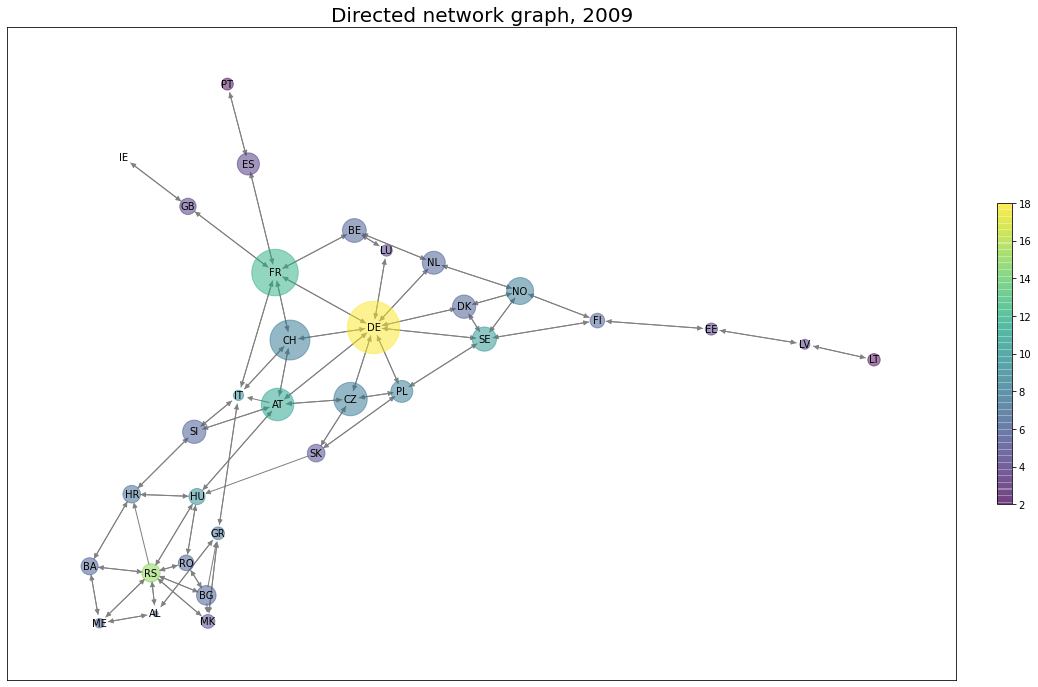

In [17]:
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G2009, seed = 100, scale = 10)

node_size = [v*0.05 for v in total_export2009]
node_color = [float(G2009.degree(v)) for v in G2009]

# Draw nodes
nodes = nx.draw_networkx_nodes(G2009,pos, node_size=node_size, node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G2009, pos, edge_color='grey', width=1,)

# Add labels
nx.draw_networkx_labels(G2009,pos,font_size=10)
plt.title('Directed network graph, 2009', fontsize=20)
# nodes.set_edgecolor('gray')

# add a side bar with color scale for degree centrality
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0,1)
plt.axis('off')
plt.show()

In [ ]:
#save the image
#plt.savefig('DiGraph_2009.png', dpi=1000)

# 2014

In [18]:
df2014 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2014')
df2014.head()
df_elec2014 = df2014.drop(['Origin_Country'], axis=1)
df_elec2014.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5821,263.0,5484.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3119.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,614.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1514.0,0.0,0.0,0.0,5296.0


In [19]:
# Convert the wide table to long table
Country_list = list(df_elec2014.columns)
df_elec2014 = df_elec2014.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2014.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2014.head()
# Sort the table based on origin country's name
df_elec2014.sort_values('Origin', inplace=True, ascending=True)
df_elec2014.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2014.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2014 = df_elec2014[df_elec2014.Electricity_Flow != 0]
df_elec2014.head()

df_total_export2014 = df_elec2014.groupby(['Origin'], as_index=False).sum()
# df_total_export.reset_index()
df_total_export2014.head()
# total_export = np.asarray(df_total_export['Electricity_Flow'])
nodelist2014 = list(df_total_export2014['Origin'])


# use this to compare the size of the nodes
df_total_export2014_sorted = df_total_export2014.sort_values(by='Electricity_Flow', ascending=False)
df_total_export2014_sorted

total_export2014 = np.asarray(df_total_export2014['Electricity_Flow'])
total_export2014

# when signing the code_size, it must have the same length of country list
len(total_export2014)

34

In [20]:
total_export2014

array([  414., 18791.,  5998.,  4190., 13774., 32439., 28138., 68884.,
        9801.,  3848.,  9642.,  3858., 73575.,  3704.,   684.,  6644.,
        5683.,   239.,  3008.,   244.,   994.,  3022.,  3640.,  2637.,
       17899., 20879., 11341.,  6343.,  8356.,  5049., 32348.,  9962.,
        9421.,  1977.])

In [21]:
class create_graph:
    """
    read the dataframe and creates the two elements that form a graph, nodes and edges
    """
    
    def __init__(self):
        data = df_elec2014
        self.Network = df_elec2014
        
        # create list of Origin-Destination pairs
        self.graph = np.asarray(self.Network[['Origin', 'Destination']])
        
        self.nodes = np.unique(self.graph)
        self.weights = list(map(float, self.Network['Electricity_Flow']))
    
    def networkList(self):
        G2014 = nx.DiGraph() # create a directed graph called G2014
        
        # add nodes
        for node in self.nodes:
            G2014.add_node(node)
        
       # add edges 
        self.graph_1 = []
        for edge in self.graph:
            G2014.add_edge(edge[0], edge[1])
            self.graph_1.append((edge[0], edge[1]))
        
        # add lables as a dictionary, key is Origin-Destination pair, value is flow
        labels = dict(list(zip(self.graph_1, self.weights)))
        
        return G2014, labels

In [22]:
gr2014 = create_graph()
graph2014 = gr2014.graph 
G2014, labels = gr2014.networkList() 

AttributeError: 'Colorbar' object has no attribute 'set_clim'

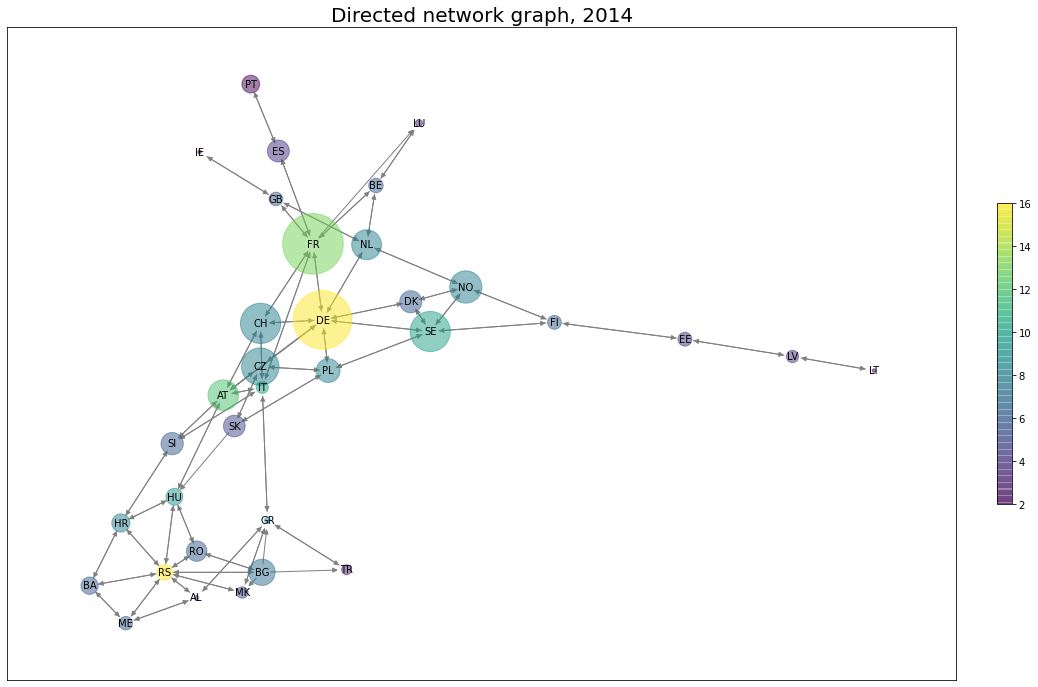

In [24]:
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G2014, seed = 100, scale = 10)

node_size = [v*0.05 for v in total_export2014]
node_color = [float(G2014.degree(v)) for v in G2014]

# Draw nodes
nodes = nx.draw_networkx_nodes(G2014,pos, node_size=node_size, node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G2014, pos, edge_color='grey', width=1,)

# Add labels
nx.draw_networkx_labels(G2014,pos,font_size=10)
plt.title('Directed network graph, 2014', fontsize=20)
# nodes.set_edgecolor('gray')

# add a side bar with color scale for degree centrality
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0,1)
plt.axis('off')
plt.show()

# 2018

In [25]:
df2018 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2018')
df2018.head()
df_elec2018 = df2018.drop(['Origin_Country'], axis=1)
df_elec2018.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


In [26]:
# Convert the wide table to long table
Country_list = list(df_elec2018.columns)
df_elec2018 = df_elec2018.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2018.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2018.head()
# Sort the table based on origin country's name
df_elec2018.sort_values('Origin', inplace=True, ascending=True)
df_elec2018.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2018.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2018 = df_elec2018[df_elec2018.Electricity_Flow != 0]
df_elec2018.head()

df_total_export2018 = df_elec2018.groupby(['Origin'], as_index=False).sum()
# df_total_export.reset_index()
df_total_export2018.head()

,Origin,Electricity_Flow
0,AL,2683.0
1,AT,19057.0
2,BA,7697.0
3,BE,4313.0
4,BG,10029.0


In [27]:
# total_export = np.asarray(df_total_export['Electricity_Flow'])
nodelist2018 = list(df_total_export2018['Origin'])


# use this to compare the size of the nodes
df_total_export2018_sorted = df_total_export2018.sort_values(by='Electricity_Flow', ascending=False)
df_total_export2018_sorted

total_export2018 = np.asarray(df_total_export2018['Electricity_Flow'])
total_export2018

# when signing the code_size, it must have the same length of country list
len(total_export2018)

34

In [28]:
total_export2018

array([ 2683., 19057.,  7697.,  4313., 10029., 31694., 25459., 82674.,
       10413.,  4136.,  9129.,  3459., 75789.,  2189.,  2265.,  6533.,
        4260.,  1643.,  2638.,  2560.,  1349.,  4269.,  3011.,  2224.,
       18597., 17954.,  8111.,  8324.,  4921.,  6703., 31562.,  9320.,
        6949.,  3001.])

In [29]:
class create_graph:
    """
    read the dataframe and creates the two elements that form a graph, nodes and edges
    """
    
    def __init__(self):
        data = df_elec2018
        self.Network = df_elec2018
        
        # create list of Origin-Destination pairs
        self.graph = np.asarray(self.Network[['Origin', 'Destination']])
        
        self.nodes = np.unique(self.graph)
        self.weights = list(map(float, self.Network['Electricity_Flow']))
    
    def networkList(self):
        G2018 = nx.DiGraph() # create a directed graph called G2018
        
        # add nodes
        for node in self.nodes:
            G2018.add_node(node)
        
       # add edges 
        self.graph_1 = []
        for edge in self.graph:
            G2018.add_edge(edge[0], edge[1])
            self.graph_1.append((edge[0], edge[1]))
        
        # add lables as a dictionary, key is Origin-Destination pair, value is flow
        labels = dict(list(zip(self.graph_1, self.weights)))
        
        return G2018, labels

In [30]:
gr2018 = create_graph()
graph2018 = gr2018.graph 
G2018, labels = gr2018.networkList() 

AttributeError: 'Colorbar' object has no attribute 'set_clim'

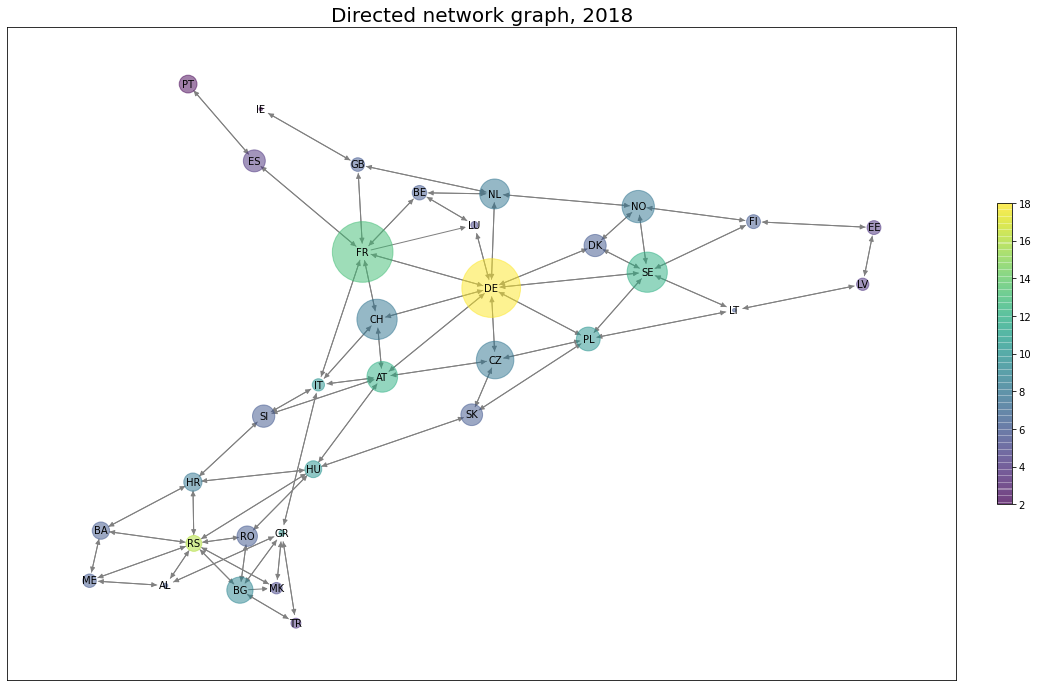

In [31]:
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G2018, seed = 100, scale = 10)

node_size = [v*0.05 for v in total_export2014]
node_color = [float(G2018.degree(v)) for v in G2018]

# Draw nodes
nodes = nx.draw_networkx_nodes(G2018,pos, node_size=node_size, node_color=node_color, alpha=0.5) 
# Draw edges
edges = nx.draw_networkx_edges(G2018, pos, edge_color='grey', width=1,)

# Add labels
nx.draw_networkx_labels(G2018,pos,font_size=10)
plt.title('Directed network graph, 2018', fontsize=20)
# nodes.set_edgecolor('gray')

# add a side bar with color scale for degree centrality
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0,1)
plt.axis('off')
plt.show()

## Network analysis

- Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as bridge along the shortest path between two other nodes. It is basically a measure of connectedness between components of the graph.

- Degree centrality

The centrality for a node measures its relative importance within the graph. The degree centrality for a node (n) is the number of nodes it is connected. The degree centrality values are normalized by the maximum degree in the graph. 

- Adjacency Matrix

The adjacency matrix is a N x N matrix where the cells constitute edges. In this example the fields are coloured according the degree centrality and as the graph is directed, the matrix is not symmetric.

In [ ]:
class graphStats:
    """
    calculte the degree centrality and betweenness centrality
    """
    
    def calculate_degree_centrality(self, graph):
        dgc_key = []
        dgc_value = []
        g = graph

        dc = nx.degree_centrality(g)
        nx.set_node_attributes(g, dc, 'degree_cent')

        from operator import itemgetter
        degcent_sorted = sorted(dc.items(), key=itemgetter(1), reverse=True)

        for key, value in degcent_sorted:
            dgc_key.append(str(key))
            dgc_value.append(value)

        return dgc_key, dgc_value
    

    def calculate_betweenness_centrality(self, graph):
        btc_key = []
        btc_value = []
        g = graph

        bc = nx.betweenness_centrality(g)

        betcent_sorted = sorted(bc.items(), key=itemgetter(1), reverse=True)

        for key, value in betcent_sorted:
            btc_key.append(str(key))
            btc_value.append(value)

        return btc_key, btc_value

In [ ]:
stats = graphStats()
betc_key, betc_value = stats.calculate_betweenness_centrality(G)
degc_key, degc_value = stats.calculate_degree_centrality(G)

In [ ]:
N = G.order()
K = G.size()
avg_d = float(N)/K
avg_degree = 'Average degree: %.4f' % (avg_d)

In [ ]:
avg_d

In [ ]:
avg_degree

In [ ]:
# plot Degree centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,8))
plt.title('Degree centrality for nodes', fontsize=12)
a_lenght = np.arange(len(degc_value))
plt.bar(a_lenght, degc_key, color=cm.jet(degc_value), align='center')
plt.xticks(a_lenght, degc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)

In [ ]:
# Plot: Betweenness_centrality
plt.figure()

ax1 = plt.subplots(figsize=(10,6))

plt.title('Betweenness centrality for nodes', fontsize=12)
a_lenght = np.arange(len(betc_value))
plt.bar(a_lenght, betc_value, color=cm.jet(betc_value), align='center')
plt.xticks(a_lenght, betc_key, size='small', rotation='vertical')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)
plt.autoscale(enable=True, axis='both', tight=None)
plt.ylim(0, max(betc_value) * 1.1)
plt.plot(betc_value, '--b')